In [29]:
import torch
from my_utils.model_class import MLP

device = torch.device("cpu")

model = MLP(in_nums=16, out_nums=2, drop_p=0.5)
model.load_state_dict(torch.load('models/model_mt_c2_s0.1_b16_lr0.001_d0.5_e70.pth', map_location=device))

# 运算
model.eval()

MLP(
  (linear1): Linear(in_features=16, out_features=16, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (relu1): ReLU()
  (linear2): Linear(in_features=16, out_features=8, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (relu2): ReLU()
  (linear3): Linear(in_features=8, out_features=2, bias=True)
)

In [30]:
import numpy as np
import pandas as pd

file_name = 'data/mt_space_1d_rate_20d_17-21_pre' + '/0.csv'
data_in_sample = pd.read_csv(file_name)

data_in_sample = data_in_sample.dropna(axis=0)

data_in_sample.insert(loc=0, column='return_bin', value=np.nan)

data_in_sample.loc[data_in_sample['yield_rate']>0, 'return_bin'] = 0
data_in_sample.loc[data_in_sample['yield_rate']<=0, 'return_bin'] = 1

data_in_sample

,return_bin,order_book_id,board_type,sector_code,month,date,yield_rate,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,...,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
0,1.0,600519.XSHG,MainBoard,ConsumerStaples,0,2017-01-03,-0.092587,1.582679,-1.683954,1.603209,...,0.401807,0.988619,0.061485,-0.671471,-1.318601,-1.576493,-1.136058,-1.217233,0.560313,0.139982
1,1.0,600519.XSHG,MainBoard,ConsumerStaples,1,2017-01-04,-0.645762,1.302261,-1.583147,1.336612,...,1.080383,0.988619,1.075444,-0.532821,-1.266669,-1.548342,-1.060905,-1.199013,1.141963,0.551387
2,1.0,600519.XSHG,MainBoard,ConsumerStaples,2,2017-01-05,-0.369527,1.382886,-1.613186,1.413263,...,0.609067,0.988619,0.685052,-0.505367,-1.217169,-1.570874,-1.030676,-1.189542,0.668555,0.023353
3,1.0,600519.XSHG,MainBoard,ConsumerStaples,3,2017-01-06,-0.581350,1.319990,-1.589829,1.353466,...,0.988294,1.719976,0.894761,-0.401765,-1.102462,-1.549486,-0.995422,-1.178730,1.176819,0.547457
4,1.0,600519.XSHG,MainBoard,ConsumerStaples,4,2017-01-09,-0.357646,1.355014,-1.602902,1.386764,...,1.230286,0.988619,0.717882,-0.355223,-1.052310,-1.575254,-0.972552,-1.170599,1.197702,0.310576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0.0,600519.XSHG,MainBoard,ConsumerStaples,1192,2021-11-29,0.439775,-1.199925,0.939052,-1.223484,...,1.741930,0.988619,1.417920,-0.941589,-0.287143,0.235562,1.221078,0.919459,0.760456,0.329757
1190,0.0,600519.XSHG,MainBoard,ConsumerStaples,1193,2021-11-30,0.818726,-1.118328,0.814286,-1.150999,...,0.771590,0.988619,0.726018,-0.953039,-0.285410,0.253470,1.322049,0.900321,0.468537,0.267050
1191,0.0,600519.XSHG,MainBoard,ConsumerStaples,1194,2021-12-01,0.234917,-1.121759,0.819394,-1.154046,...,0.957610,1.719976,0.651600,-0.961177,-0.338331,0.246088,1.344969,0.868925,0.363120,0.467004
1192,0.0,600519.XSHG,MainBoard,ConsumerStaples,1195,2021-12-02,0.427783,-1.123316,0.821717,-1.155430,...,1.004908,1.719976,0.586634,-0.969949,-0.386910,0.238948,1.402479,0.808674,0.583062,0.834642


In [31]:
X_in_sample = data_in_sample.loc[:, 'ep_ratio_ttm': 'BR']
y_in_sample = data_in_sample.loc[:, 'return_bin']

In [32]:
X_in_sample

,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,MACD_DIFF,MACD_DEA,MACD_HIST,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
0,1.582679,-1.683954,1.603209,-0.237438,-0.255987,-0.006208,0.401807,0.988619,0.061485,-0.671471,-1.318601,-1.576493,-1.136058,-1.217233,0.560313,0.139982
1,1.302261,-1.583147,1.336612,-0.175133,-0.241780,0.156462,1.080383,0.988619,1.075444,-0.532821,-1.266669,-1.548342,-1.060905,-1.199013,1.141963,0.551387
2,1.382886,-1.613186,1.413263,-0.143321,-0.223657,0.205494,0.609067,0.988619,0.685052,-0.505367,-1.217169,-1.570874,-1.030676,-1.189542,0.668555,0.023353
3,1.319990,-1.589829,1.353466,-0.108782,-0.201822,0.251971,0.988294,1.719976,0.894761,-0.401765,-1.102462,-1.549486,-0.995422,-1.178730,1.176819,0.547457
4,1.355014,-1.602902,1.386764,-0.090909,-0.180558,0.244829,1.230286,0.988619,0.717882,-0.355223,-1.052310,-1.575254,-0.972552,-1.170599,1.197702,0.310576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,-1.199925,0.939052,-1.223484,1.105807,0.428457,2.317034,1.741930,0.988619,1.417920,-0.941589,-0.287143,0.235562,1.221078,0.919459,0.760456,0.329757
1190,-1.118328,0.814286,-1.150999,1.125241,0.581987,1.901028,0.771590,0.988619,0.726018,-0.953039,-0.285410,0.253470,1.322049,0.900321,0.468537,0.267050
1191,-1.121759,0.819394,-1.154046,1.130340,0.705895,1.530098,0.957610,1.719976,0.651600,-0.961177,-0.338331,0.246088,1.344969,0.868925,0.363120,0.467004
1192,-1.123316,0.821717,-1.155430,1.120599,0.802952,1.193881,1.004908,1.719976,0.586634,-0.969949,-0.386910,0.238948,1.402479,0.808674,0.583062,0.834642


In [33]:
from torch.utils.data import TensorDataset

dataset_in_sample = TensorDataset(torch.from_numpy(X_in_sample.values).type(torch.FloatTensor), torch.from_numpy(y_in_sample.values).type(torch.LongTensor))

for a, b in dataset_in_sample:
    print(a, b)

tensor([ 1.5827, -1.6840,  1.6032, -0.2374, -0.2560, -0.0062,  0.4018,  0.9886,
         0.0615, -0.6715, -1.3186, -1.5765, -1.1361, -1.2172,  0.5603,  0.1400]) tensor(1)
tensor([ 1.3023, -1.5831,  1.3366, -0.1751, -0.2418,  0.1565,  1.0804,  0.9886,
         1.0754, -0.5328, -1.2667, -1.5483, -1.0609, -1.1990,  1.1420,  0.5514]) tensor(1)
tensor([ 1.3829, -1.6132,  1.4133, -0.1433, -0.2237,  0.2055,  0.6091,  0.9886,
         0.6851, -0.5054, -1.2172, -1.5709, -1.0307, -1.1895,  0.6686,  0.0234]) tensor(1)
tensor([ 1.3200, -1.5898,  1.3535, -0.1088, -0.2018,  0.2520,  0.9883,  1.7200,
         0.8948, -0.4018, -1.1025, -1.5495, -0.9954, -1.1787,  1.1768,  0.5475]) tensor(1)
tensor([ 1.3550, -1.6029,  1.3868, -0.0909, -0.1806,  0.2448,  1.2303,  0.9886,
         0.7179, -0.3552, -1.0523, -1.5753, -0.9726, -1.1706,  1.1977,  0.3106]) tensor(1)
tensor([ 1.3473, -1.6001,  1.3795, -0.0783, -0.1609,  0.2252,  1.1328,  0.9886,
         0.6759, -0.4178, -1.0241, -1.5717, -0.9521, -1.1649,  1.

In [34]:
dataset_in_sample.tensors

(tensor([[ 1.5827, -1.6840,  1.6032,  ..., -1.2172,  0.5603,  0.1400],
         [ 1.3023, -1.5831,  1.3366,  ..., -1.1990,  1.1420,  0.5514],
         [ 1.3829, -1.6132,  1.4133,  ..., -1.1895,  0.6686,  0.0234],
         ...,
         [-1.1218,  0.8194, -1.1540,  ...,  0.8689,  0.3631,  0.4670],
         [-1.1233,  0.8217, -1.1554,  ...,  0.8087,  0.5831,  0.8346],
         [-1.1806,  0.9089, -1.2063,  ...,  0.8072,  0.9871,  1.0904]]),
 tensor([1, 1, 1,  ..., 0, 0, 0]))

In [35]:
dataset_in_sample.tensors[0]

tensor([[ 1.5827, -1.6840,  1.6032,  ..., -1.2172,  0.5603,  0.1400],
        [ 1.3023, -1.5831,  1.3366,  ..., -1.1990,  1.1420,  0.5514],
        [ 1.3829, -1.6132,  1.4133,  ..., -1.1895,  0.6686,  0.0234],
        ...,
        [-1.1218,  0.8194, -1.1540,  ...,  0.8689,  0.3631,  0.4670],
        [-1.1233,  0.8217, -1.1554,  ...,  0.8087,  0.5831,  0.8346],
        [-1.1806,  0.9089, -1.2063,  ...,  0.8072,  0.9871,  1.0904]])

Average Feature Importances
ep_ratio_ttm :  0.045
pb_ratio_ttm :  -0.007
sp_ratio_ttm :  -0.010
MACD_DIFF :  0.013
MACD_DEA :  0.005
MACD_HIST :  0.002
RSI10 :  -0.008
SY :  0.020
BIAS20 :  -0.015
VOL30 :  0.055
VOL60 :  0.020
VOL120 :  -0.049
VOLT20 :  0.004
VOLT60 :  -0.028
AR :  -0.128
BR :  0.004


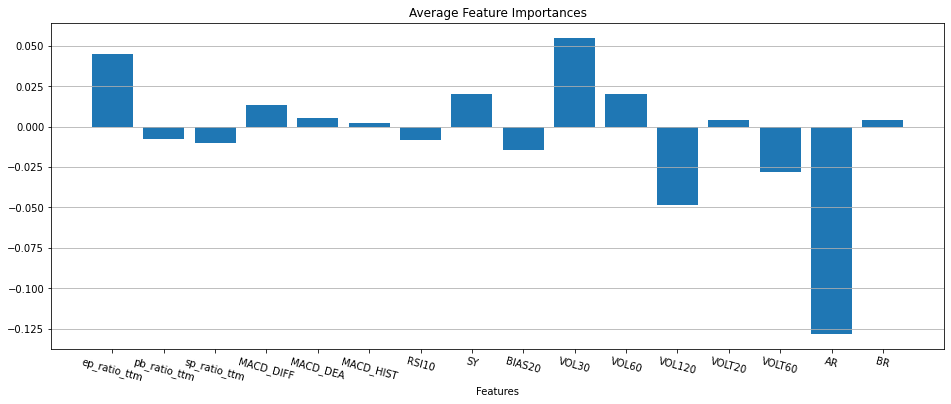

In [36]:
from matplotlib import pyplot as plt
from captum.attr import IntegratedGradients

ig = IntegratedGradients(model)
temp = dataset_in_sample.tensors[0]
temp.requires_grad_()
attr, delta = ig.attribute(temp, target=0, return_convergence_delta=True)
attr = attr.detach().numpy()
# Helper method to print importances and visualize distribution
def visualize_importances(feature_names, importances, title="Average Feature Importances", plot=True, axis_title="Features"):
    print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ": ", '%.3f'%(importances[i]))
    x_pos = (np.arange(len(feature_names)))
    if plot:
        plt.figure(figsize=(16,6))
        plt.bar(x_pos, importances, align='center')
        plt.xticks(x_pos, feature_names, rotation=-15)
        plt.xlabel(axis_title)
        plt.title(title)
        plt.grid(axis='y')
visualize_importances(feature_names=X_in_sample.columns.values.tolist(), importances=np.mean(attr, axis=0))

Average Neuron Importances
0 :  -0.045
1 :  0.083
2 :  0.065
3 :  -0.050
4 :  -0.019
5 :  -0.040
6 :  0.056
7 :  0.079
8 :  -0.072
9 :  0.096
10 :  -0.059
11 :  0.065
12 :  -0.029
13 :  -0.043
14 :  -0.073
15 :  -0.091


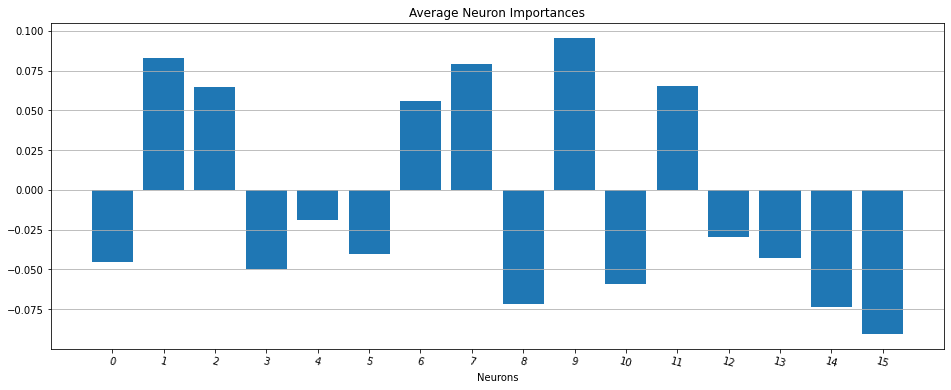

In [37]:
from captum.attr import LayerConductance

cond = LayerConductance(model, model.relu1)
cond_vals = cond.attribute(dataset_in_sample.tensors[0], target=0)
cond_vals = cond_vals.detach().numpy()
visualize_importances(range(16),np.mean(cond_vals, axis=0),title="Average Neuron Importances", axis_title="Neurons")

Average Feature Importances for Neuron 9
ep_ratio_ttm :  0.013
pb_ratio_ttm :  0.017
sp_ratio_ttm :  0.000
MACD_DIFF :  -0.001
MACD_DEA :  0.003
MACD_HIST :  -0.001
RSI10 :  0.003
SY :  0.000
BIAS20 :  0.004
VOL30 :  0.031
VOL60 :  -0.001
VOL120 :  0.008
VOLT20 :  0.011
VOLT60 :  -0.008
AR :  -0.000
BR :  0.015


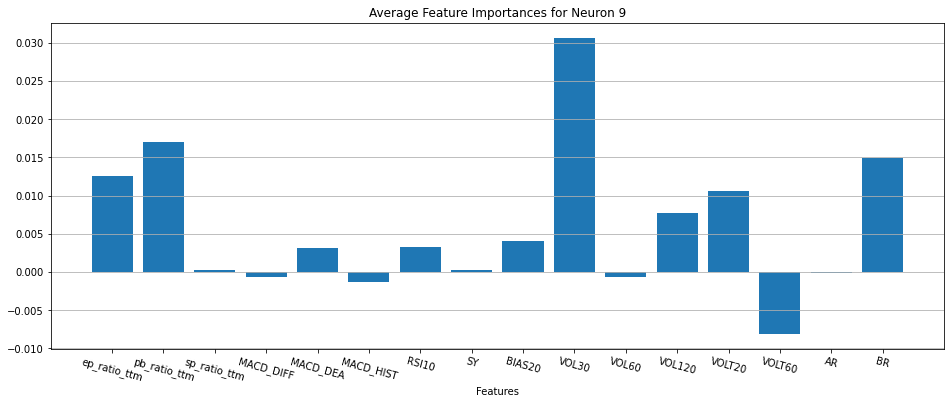

In [38]:
from captum.attr import NeuronConductance

neuron_cond = NeuronConductance(model, model.relu1)

neuron_cond_vals_9 = neuron_cond.attribute(dataset_in_sample.tensors[0], neuron_selector=9, target=0)

neuron_cond_vals_15 = neuron_cond.attribute(dataset_in_sample.tensors[0], neuron_selector=15, target=0)

visualize_importances(X_in_sample.columns.values.tolist(), neuron_cond_vals_9.mean(dim=0).detach().numpy(), title="Average Feature Importances for Neuron 9")

Average Feature Importances for Neuron 15
ep_ratio_ttm :  0.004
pb_ratio_ttm :  -0.001
sp_ratio_ttm :  -0.016
MACD_DIFF :  0.000
MACD_DEA :  0.000
MACD_HIST :  -0.012
RSI10 :  0.001
SY :  0.000
BIAS20 :  0.007
VOL30 :  -0.006
VOL60 :  0.000
VOL120 :  -0.022
VOLT20 :  -0.003
VOLT60 :  -0.004
AR :  -0.034
BR :  -0.002


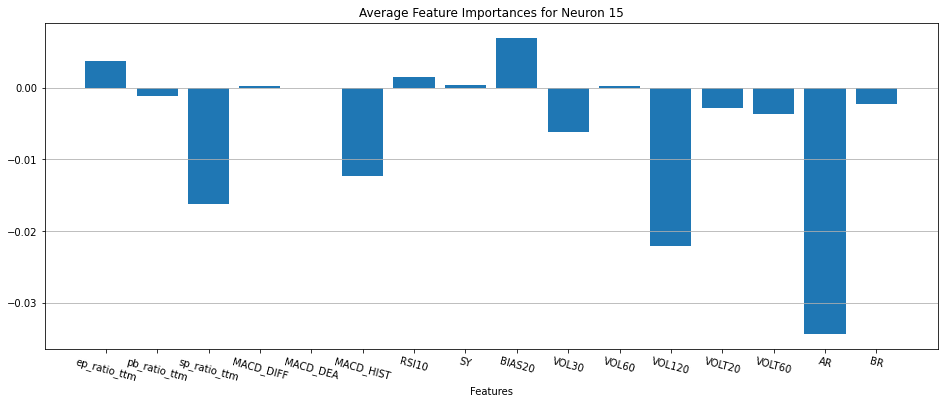

In [39]:
visualize_importances(X_in_sample.columns.values.tolist(), neuron_cond_vals_15.mean(dim=0).detach().numpy(), title="Average Feature Importances for Neuron 15")